## EcodeCamp Software Company
## Name : Sheema Masood 
## Data Science Internship
### AUGUST 2024 TO SEPTEMBER 2024
--------------------------------------------------------------------------------------------------------------------------------------------------------

# Task 1 : Exploratory Data Analysis (EDA) on Customer Churn
### Objective: Conduct an exploratory data analysis on a customer churn dataset to identify patterns and insights.

## Task Roadmap:
    1.	Data Collection:
            •	Use a customer churn dataset from Kaggle or similar sources.
            •	Review features and target variables.
    2.	Data Preprocessing:
            •	Handle missing values and outliers.
            •	Normalize or standardize data if necessary.
    3.	Exploratory Analysis:
            •	Perform statistical analysis to understand data distributions.
            •	Visualize data using histograms, scatter plots, and correlation matrices.
            •	Identify patterns and potential predictors of churn.
    4.	Report Generation:
            •	Create a comprehensive report detailing findings and insights.
            •	Include visualizations and statistical summaries.
--------------------------------------------------------------------------------------------------------------------------------------------------------
## Introduction
The dataset used in this analysis is the Telco Customer Churn dataset, sourced from Kaggle. This dataset contains information on a fictional telecommunications company's customer base, including customer demographics, service usage metrics, and a churn indicator, which signifies whether a customer has left the company or not.

### Features Overview:
    * Customer Demographics: Information such as gender, age, seniority, and whether the customer has dependents.
    * Service Usage Metrics: Details about the services used by customers, including phone, internet, and streaming services. 
    * Additionally, it covers the type of contracts customers have, payment methods, and monthly and total charges.
    * Churn Indicator: A binary feature that indicates whether a customer has churned (left the company) or not.
    
### Purpose of the Analysis:

The primary objective of this analysis is to identify patterns and gain insights that can help predict customer churn. By understanding the factors that contribute to churn, the company can develop strategies to retain customers and reduce churn rates, ultimately improving business performance and customer satisfaction.
-------------------------------------------------------------------------------------------------------------------------------------------------------

### IMport libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold

## Understanding the data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# drop customerID ,it doesnt effect on target
df.drop('customerID', axis=1, inplace=True)

In [6]:
df.shape

(7043, 20)

In [7]:
# apply loop check unique value without int or float in dataset
for i in df.columns:
    if df[i].dtype != 'int64' and df[i].dtype != 'float64':
        print(f'{i} : {df[i].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


## Defining Target and Features for Customer Churn Analysis

This analysis aims to predict customer churn in a telecommunications (telco) company. We'll use a dataset containing information about customer demographics, service usage, account details, and financial data to build a predictive model.

**Target Variable:**

* **Churn: This binary variable indicates whether a customer has churned (left the service) or remained a customer.
    * **1: Customer has churned.
    * **0: Customer is still active.

**Features (Predictor Variables):**

We'll use the following features to predict churn:

**1. Customer Demographics:**

* **gender:** Gender of the customer (likely binary: Male/Female).
* **SeniorCitizen:** Indicates if the customer is a senior citizen (binary: 0 = No, 1 = Yes).
* **Partner:** Whether the customer has a partner (binary: Yes/No).
* **Dependents:** Whether the customer has dependents (binary: Yes/No).

**2. Account and Service Usage:**

* **tenure:** Length of time the customer has been with the telco (in months).
* **PhoneService:** Whether the customer has phone service (binary: Yes/No).
* **MultipleLines:** Whether the customer has multiple phone lines (categorical: No phone service, Yes, No).
* **InternetService:** Type of internet service the customer has (categorical: DSL, Fiber optic, No).
* **OnlineSecurity:** Whether the customer has online security service (binary: Yes/No).
* **OnlineBackup:** Whether the customer has online backup service (binary: Yes/No).
* **DeviceProtection:** Whether the customer has device protection (binary: Yes/No).
* **TechSupport:** Whether the customer has tech support (binary: Yes/No).
* **StreamingTV:** Whether the customer has streaming TV service (binary: Yes/No).
* **StreamingMovies:** Whether the customer has streaming movie service (binary: Yes/No).

**3. Account Details:**

* **Contract:** Type of contract the customer has (categorical: Month-to-month, One year, Two year).
* **PaperlessBilling:** Whether the customer uses paperless billing (binary: Yes/No).
* **PaymentMethod:** How the customer pays their bills (categorical: Electronic check, Mailed check, Bank transfer, Credit card).

**4. Financial:**

* **MonthlyCharges:** Amount the customer pays each month.
* **TotalCharges:** Total amount the customer has paid to the telco (numeric).

**Note:**

* Categorical features will need to be encoded (e.g., one-hot encoding) before being used in machine learning models.
* We may explore creating additional features through feature engineering to improve model performance.

In [8]:
#saving our target and feature  
target = df['Churn']
features = df.drop(columns=['Churn'])

-------------------------------------------------------------------------------------------------------------------------------------------------------
## Data preprocessing
     1- Handling Missing Values:
         There are no missing values in dataset as we can see in df.info
     2- Transforming Data:
          - Convert Sinior citizen column into str  :
                Since Sinior citizen is stored as an int, convert it to str , because it represents categorial data.
          - - Convert TotalCharges to Numeric:
                Since TotalCharges is stored as an object, convert it to a numeric data type (float64).
     3- Managing Outliers:
         Check for outliers that might distort the analysis or model performance.

In [9]:
# Map 0 to 'No' and 1 to 'Yes' directly in senior citizen
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

### Managing outliers

In [10]:
# Remove leading/trailing spaces
df['TotalCharges'] = df['TotalCharges'].str.strip()  

# Convert the TotalCharges column to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert and set non-convertible values to NaN
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df['TotalCharges'].isnull().sum()

0

In [11]:
print('Statistical Analysis Of Numeric Columns')
df.describe()

Statistical Analysis Of Numeric Columns


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


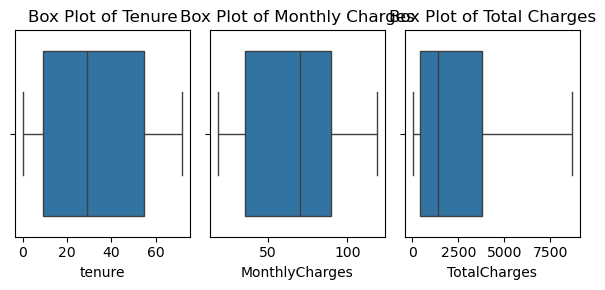

In [12]:
# Create a figure with 1 row and 3 columns
plt.figure(figsize=(6, 3))  # Adjust figsize to ensure plots are not too small

# Tenure box plot
plt.subplot(1, 3, 1)
sns.boxplot(x=df['tenure'])
plt.title('Box Plot of Tenure')

# MonthlyCharges box plot
plt.subplot(1, 3, 2)
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Box Plot of Monthly Charges')

# TotalCharges box plot
plt.subplot(1, 3, 3)
sns.boxplot(x=df['TotalCharges'])
plt.title('Box Plot of Total Charges')

# Adjust layout
plt.tight_layout()

# Optionally save the plot 
plt.savefig('Box_Plot_for_Monthly_Charges_Total_Charges_and_Tenure.png')

# Show the plot
plt.show()

### Key Findings:
        1- Tenure:
            The box plot for tenure shows no significant outliers. The data appears well-distributed within the whiskers, so no action is required here.
        2- MonthlyCharges:
            Similar to tenure, the MonthlyCharges box plot does not show significant outliers, indicating no extreme values that need to be addressed.
        3- TotalCharges:
            no significant outliers

--------------------------------------------------------------------------------------------------------------------------------------------------------

## Exploratory Data Analysis

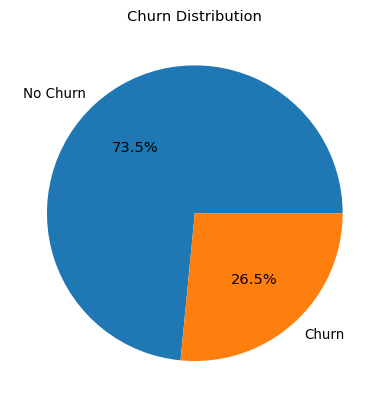

In [39]:
# target column
df_churn_counts = df['Churn'].value_counts()
plt.pie(df_churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.savefig('Churn Distribution.png')
plt.show()

#### we can see the our data is highly imbalanced


## Churn: Target Column

The pie chart represents the distribution of churned and non-churned customers in the dataset. Here are the key findings and insights based on this chart:

1. **Churn Rate**: 
   - 26.5% of customers have churned (represented in orange).
   - This indicates that approximately one-quarter of the customers have left the service or discontinued their relationship with the business.

2. **Retention Rate**:
   - 73.5% of customers have not churned (represented in blue).
   - This shows that a significant portion of the customer base is still retained, suggesting customer satisfaction or loyalty for the majority.
y.


### Identify Patterns and Potential Predictors
#### Visualizing the relationships between features and churn using various plots.

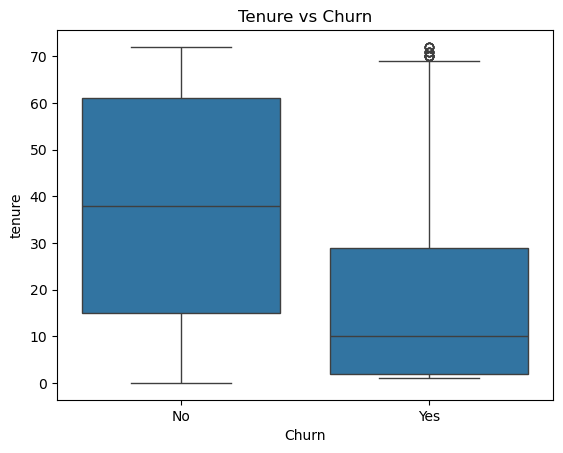

In [14]:
# Visualize relationship between tenure and churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.savefig('Tenure Vs Churn.png')
plt.show()

####  Tenure and Churn:

### Key Findings:
* Customers with a longer tenure are less likely to churn, as depicted by the higher median and wider spread for those who did not churn.
* Customers who churned tend to have a shorter tenure, indicating that newer customers are more likely to leave compared to those who have been with the company for a longer time.

### Insights:
* Implementing onboarding and early engagement strategies could help in retaining new customers during the critical early months.

### Relationship of monthly & total charges with Churn:

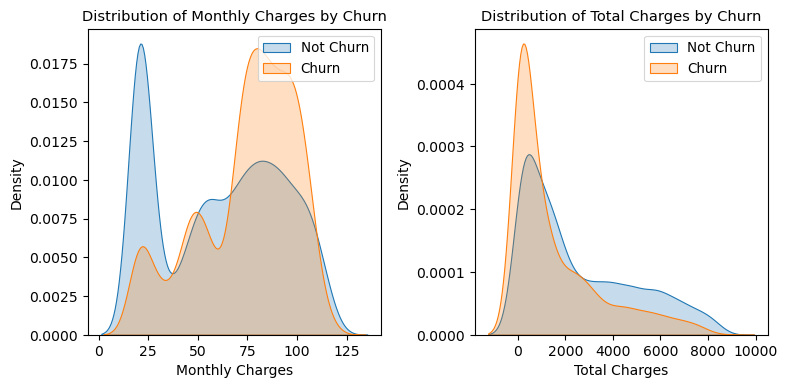

In [15]:
# Set up the figure and axes for the two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# Plot for Monthly Charges
sns.set_context("paper", font_scale=1.1)
ax1 = sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'No'], fill=True, ax=axes[0])
ax1 = sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'Yes'], fill=True, ax=axes[0])
axes[0].set_title('Distribution of Monthly Charges by Churn')
axes[0].legend(["Not Churn", "Churn"], loc='upper right')
axes[0].set_ylabel('Density')
axes[0].set_xlabel('Monthly Charges')

# Plot for Total Charges
sns.set_context("paper", font_scale=1.1)
ax2 = sns.kdeplot(df.TotalCharges[df["Churn"] == 'No'], fill=True, ax=axes[1])
ax2 = sns.kdeplot(df.TotalCharges[df["Churn"] == 'Yes'], fill=True, ax=axes[1])
axes[1].set_title('Distribution of Total Charges by Churn')
axes[1].legend(["Not Churn", "Churn"], loc='upper right')
axes[1].set_ylabel('Density')
axes[1].set_xlabel('Total Charges')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('Distribution of total & Monthly charges.png')

# Show the plots
plt.show()



### Key Findings "Relationship Between Monthly & Total Charges with Churn":
* The density plot shows that customers who churn (orange) tend to have higher monthly charges compared to those who do not churn (blue).
* For total charges, the density plot reveals that churned customers (orange) generally have accumulated lower total charges compared to non-churned customers (blue).

### Insights:
* Higher monthly charges are correlated with a higher likelihood of churn, indicating that pricing could be a key factor in customer retention.
* This suggests that customers who leave early (churn) tend to accumulate fewer total charges, likely because they have a shorter tenure or were dissatisfied early in the relationship.

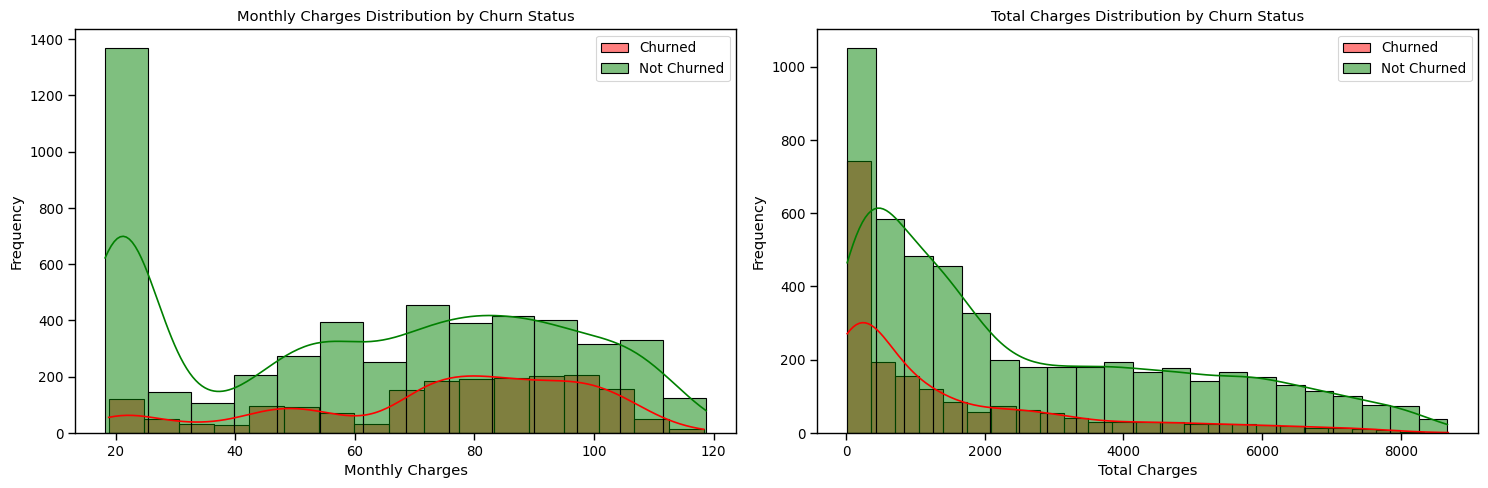

In [16]:
# Create a figure with a grid of 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

# Plot for MonthlyCharges
sns.histplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], color='red', label='Churned', kde=True, ax=axes[0])
sns.histplot(df[df['Churn'] == 'No']['MonthlyCharges'], color='green', label='Not Churned', kde=True, ax=axes[0])
axes[0].legend()
axes[0].set_title('Monthly Charges Distribution by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Frequency')

# Plot for TotalCharges
sns.histplot(df[df['Churn'] == 'Yes']['TotalCharges'], color='red', label='Churned', kde=True, ax=axes[1])
sns.histplot(df[df['Churn'] == 'No']['TotalCharges'], color='green', label='Not Churned', kde=True, ax=axes[1])
axes[1].legend()
axes[1].set_title('Total Charges Distribution by Churn Status')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('Distribution of Monthly & total charges by Churn Status.png')
plt.show()



###  ***"Distribution of Monthly and Total Charges by Churn"***

### Key Findings:
* The histogram shows that customers with low monthly charges (around $20) rarely churn. However, as the monthly charges increase, the number of churned customers (red) also increases, especially in the mid-range charges.
* The histogram indicates that churned customers generally have lower total charges. Non-churned customers (green) tend to have higher total charges, suggesting they have been with the company longer or have more services.

### Insights: 
* Customers with higher total charges, likely due to longer tenure or more services, are less likely to churn. This underscores the importance of customer satisfaction and long-term engagement.
* While low charges retain customers, mid-to-high charges may lead to dissatisfaction, prompting churn. This highlights the need to align pricing with perceived value.

### General Conclusion:
**Pricing and Retention:** Both sets of charts suggest that while higher monthly charges can drive churn, customers who stay longer and accumulate higher total charges tend to remain loyal. Pricing strategies should consider customer value perception, particularly for higher-tier services.

#### Relationship between type of Internet services with churn

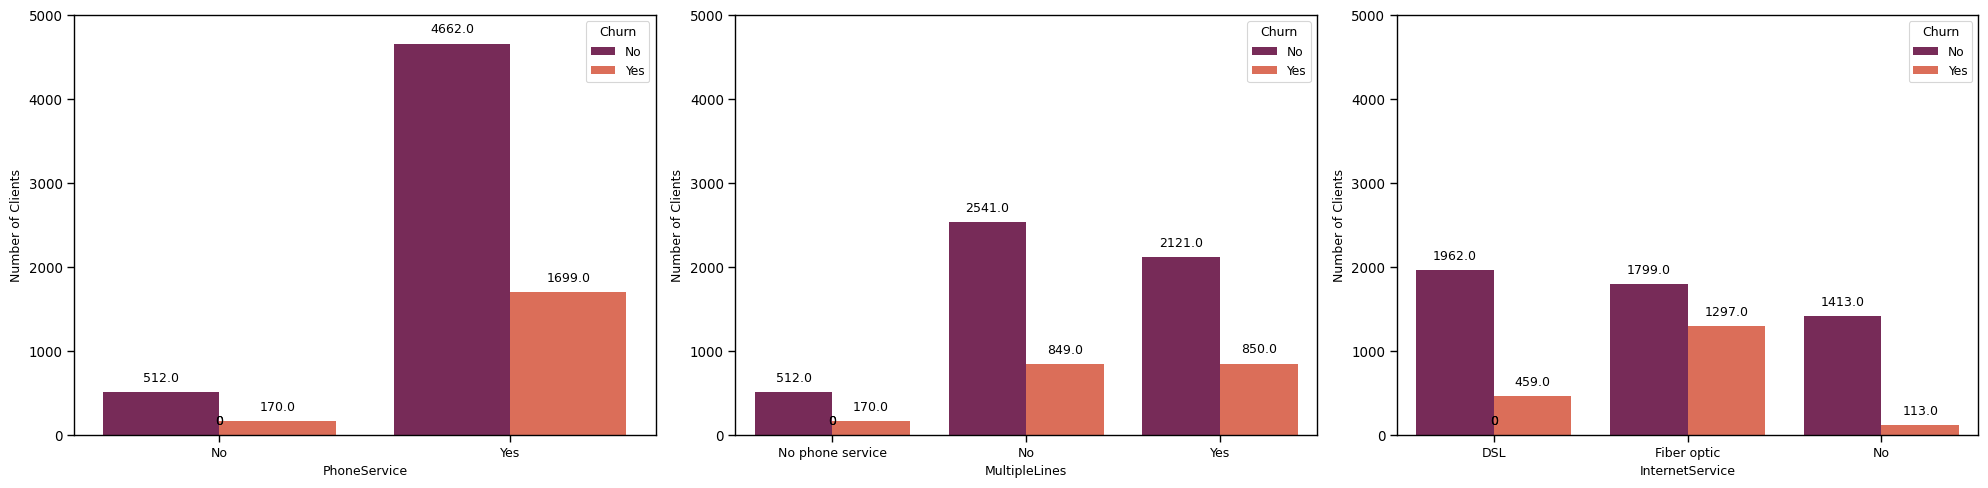

In [17]:
# List of columns to plot
internet_service = ['PhoneService', 'MultipleLines', 'InternetService']

# Create a figure with a grid of 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # Adjust figsize as needed

# Iterate over columns and axes
for i, col in enumerate(internet_service):
    # Plot on the corresponding axis
    sns.countplot(data=df, x=col, hue="Churn", palette='rocket', ax=axes[i])
    
    # Set labels and titles
    axes[i].set_xlabel(col, fontsize=9)
    axes[i].set_ylabel("Number of Clients", fontsize=9)
    axes[i].set_ylim(0, 5000)
    axes[i].tick_params(axis='x', labelsize=9)
    
    # Add legend
    axes[i].legend(title='Churn', fontsize='small', title_fontsize='9')

    # Annotate bars
    for p in axes[i].patches:
        axes[i].annotate(
            f'{p.get_height()}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            fontsize=9,
            xytext=(0, 10),  # 10 points vertical offset
            textcoords='offset points'
        )

# Adjust layout
plt.tight_layout()
plt.savefig('Internet_services Distribution  by churn rate')
plt.show()

### Type of Internet Service with Churn

### Key Findings:
1. Churn by Phone Service
    - Higher Churn with Phone Service: Customers with PhoneService have a significantly higher churn rate compared to those without it.
2. Churn by Multiple Lines
    - Moderate Churn with Multiple Lines: Customers who have MultipleLines tend to churn at a similar rate whether they use them or not. However, those with no phone service do not churn at all, which might indicate this group is less engaged or reliant on the service.
3. Churn by Internet Service
    - Highest Churn with Fiber Optic: Customers using Fiber optic internet service have a higher churn rate compared to those using DSL or no internet service.
4. Lowest Churn with No Internet:
   - Customers without an internet service have the lowest churn rate, suggesting they might have less dependency on the service, or are more satisfied with basic offerings.
  

### Insights: 
* Focus on upgrading DSL customers to fiber optic services, where available, to reduce churn.
* Promoting phone service as part of a bundled offer might help in reducing churn.

#### Relationships between Services features with churn

In [18]:
print(df.groupby(by=['OnlineSecurity', 'TechSupport', 'OnlineBackup' , 'DeviceProtection'])['MonthlyCharges'].mean().sort_values(ascending = False))

OnlineSecurity       TechSupport          OnlineBackup         DeviceProtection   
Yes                  Yes                  Yes                  Yes                    90.918511
No                   Yes                  Yes                  Yes                    90.428906
                     No                   Yes                  Yes                    89.195122
Yes                  No                   Yes                  Yes                    85.139462
No                   Yes                  No                   Yes                    80.545833
                     No                   No                   Yes                    79.551233
Yes                  Yes                  No                   Yes                    79.336008
No                   Yes                  Yes                  No                     77.975121
Yes                  No                   No                   Yes                    77.539429
                                          Yes        

### ***Service Subscription and Churn***:

### Key Findings:
1. When we look at the chart, it’s clear that having all four services—OnlineSecurity, TechSupport, OnlineBackup, and DeviceProtection—really makes a difference. Customers with a full set of these services score the highest, reaching up to 90.92. This suggests that when people have all their bases covered, they’re not just satisfied but truly happy with their experience.

2. On the flip side, if customers don’t have any internet services, their scores drop dramatically to just 21.08. This shows how crucial these services are—without them, the experience is significantly less positive.

3. For those who have some services but not all, the values fall in between. For example, having OnlineSecurity and TechSupport but missing out on OnlineBackup and DeviceProtection still gives a decent score, but it’s not as high as having the full package. This tells us that each service adds value, but missing just one or two can make a noticeable difference.

4. In short, the more services you offer, the happier your customers seem to be. If you’re looking to boost satisfaction or performance, focusing on providing a complete suite of services might be the key to achieving the best results.

### Insights: 
* Bundling additional services with attractive pricing or offering trial periods might encourage customers to stay.

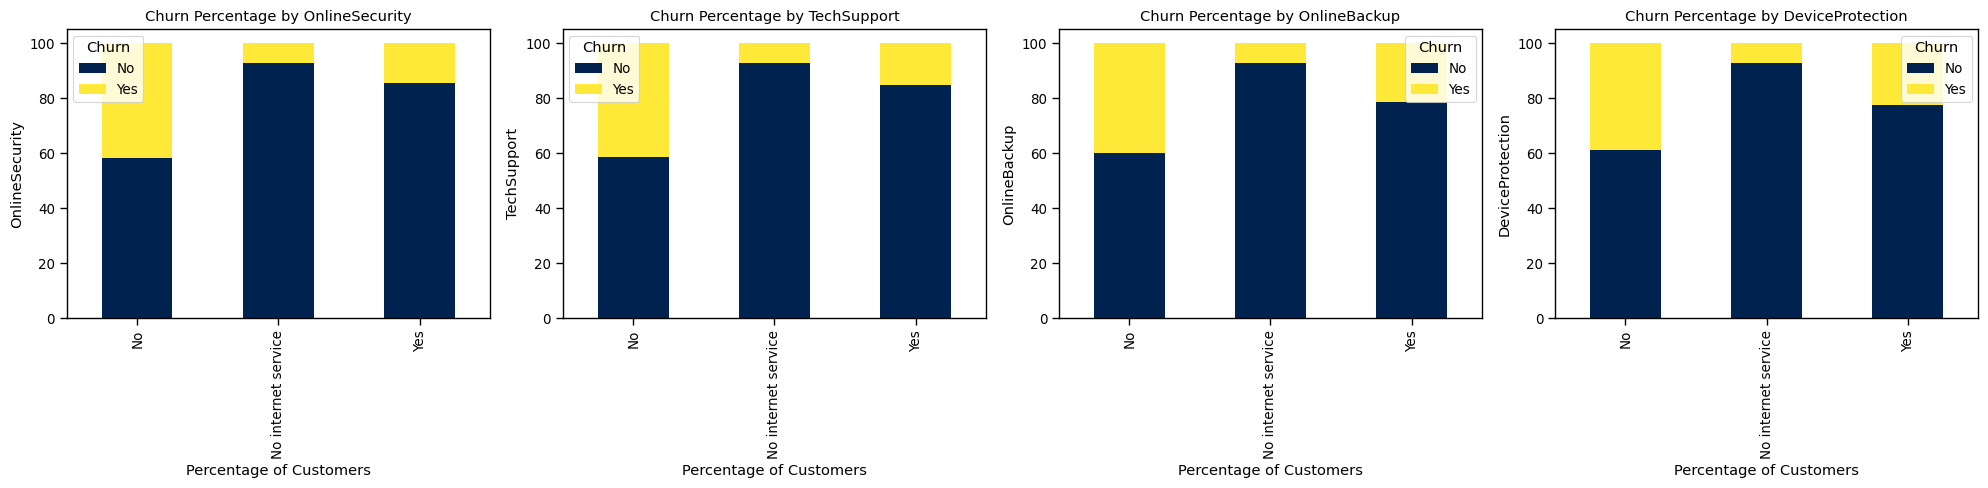

In [19]:
# Define services features
services_features = ['OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection']

# Create a figure with a grid of 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Adjust figsize as needed

for ax, feature in zip(axes, services_features):
    # Group by the feature and 'Churn' to count occurrences
    feature_churn_counts = df.groupby([feature, 'Churn']).size().unstack().fillna(0)
    
    # Calculate percentages
    feature_churn_percentages = feature_churn_counts.div(feature_churn_counts.sum(axis=1), axis=0) * 100
    
    # Plot the percentages
    feature_churn_percentages.plot(kind='bar', stacked=True, colormap='cividis', ax=ax)

    # Add titles and labels
    ax.set_title(f'Churn Percentage by {feature}')
    ax.set_xlabel('Percentage of Customers')
    ax.set_ylabel(feature)
    ax.legend(title='Churn', labels=['No', 'Yes'])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('Churn Percentage by services features.png')
plt.show()


## Key Findings: Proportion of Customers

- A higher proportion of customers **without OnlineSecurity** tend to churn compared to those with the service.
- Customers **without TechSupport** have a higher churn rate than those with TechSupport.
- Customers **without OnlineBackup** show a higher churn percentage compared to those who have this service.
- Customers **without DeviceProtection** are more likely to churn compared to those who have it.

### Insights:
Bundling additional services with attractive pricing or offering trial periods might encourage customers to stay.


### Churn w.r.t payments method

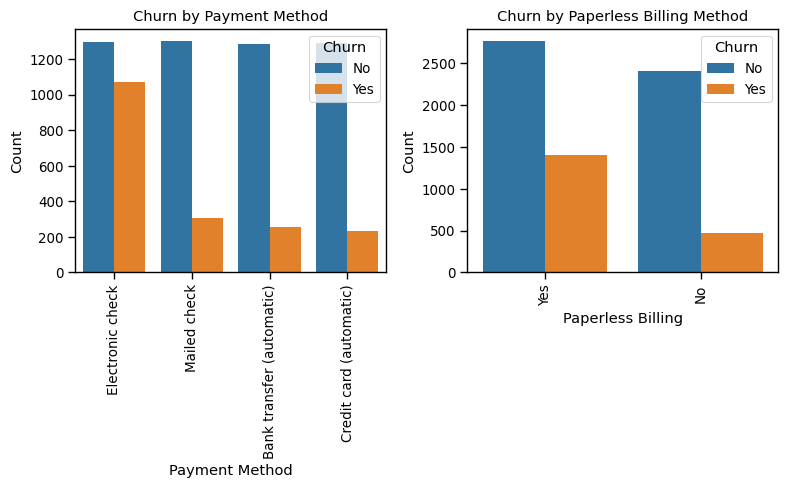

In [20]:
# Set up the figure and axes for the two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 5))  # 1 row, 2 columns

# Plot for Churn by Payment Method
sns.countplot(x='PaymentMethod', hue='Churn', data=df, ax=axes[0])
axes[0].set_title('Churn by Payment Method')
axes[0].set_xlabel('Payment Method')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot for Churn by Paperless Billing Method
sns.countplot(x='PaperlessBilling', hue='Churn', data=df, ax=axes[1])
axes[1].set_title('Churn by Paperless Billing Method')
axes[1].set_xlabel('Paperless Billing')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("Churn Count by Payment Methods.png")

# Show the plots
plt.show()


## Key Findings: Billings & Churn

1. **Churn by Payment Method**
    - **High Churn with Electronic Checks**: Customers paying via Electronic check are more likely to churn compared to those using other payment methods.
    - **Lower Churn with Automatic Payments**: Bank transfer and Credit card automatic payments have the lowest churn rates, indicating greater customer retention.

2. **Churn by Paperless Billing**
    - **Increased Churn with Paperless Billing**: Customers opting for Paperless Billing are more prone to churn than those receiving paper bills.

### Key Takeaways
- **Focus Areas for Retention**: The business should target interventions to improve satisfaction among Electronic check users and those with Paperless Billing to reduce churn.


# According to Customers Demographics:

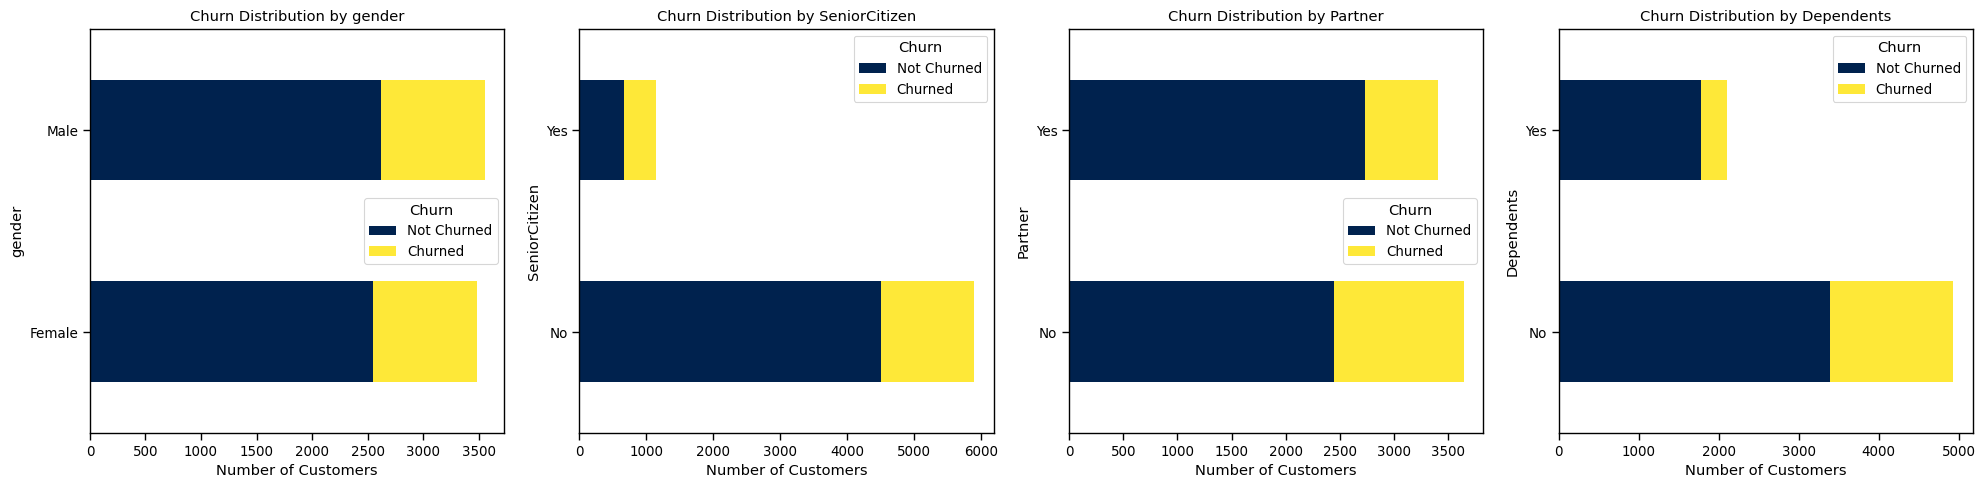

In [21]:
# List of categorical columns to plot
customer_detail = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Number of columns for the subplot grid
n_cols = len(customer_detail)

# Create a figure with a grid of 1 row and n_cols columns
fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, 5))  # Adjust figsize as needed

# Loop through each categorical column and create plots
for i, column in enumerate(customer_detail):
    # Group by the categorical column and churn, then count occurrences
    churn_counts = df.groupby([column, 'Churn']).size().unstack().fillna(0)
    
    # Plotting the bar chart in the respective subplot
    churn_counts.plot(kind='barh', stacked=True, ax=axes[i], colormap='cividis')
    
    # Adding titles and labels
    axes[i].set_title(f'Churn Distribution by {column}')
    axes[i].set_xlabel('Number of Customers')
    axes[i].set_ylabel(column)
    axes[i].legend(title='Churn', labels=['Not Churned', 'Churned'])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('Churn Distribution by demographic data.png')

plt.show()

## Key Findings

1. **Gender**
   - The churn rate is relatively similar for both Male and Female customers.

2. **SeniorCitizen**
   - Older customers (Senior Citizens) appear more likely to leave the service.

3. **Partner**
   - Customers **without a partner** exhibit a higher churn rate compared to those with a partner.
   - This could imply that having a partner may contribute to customer retention.

4. **Dependents**
   - Customers **without dependents** have a higher churn rate than those with dependents.
   - This suggests that customers with dependents might find the service more valuable or necessary, leading to lower churn.

### Insights

- **Catering to Customers with Dependents**: Understanding and addressing the needs of customers with dependents could help maintain this customer segment.
- **Improving Retention for Senior Customers**: Consider offering tailored services or incentives for senior customers to improve retention.


### Customer Distribution by Streaming Movies, streaming TV and Churn Status

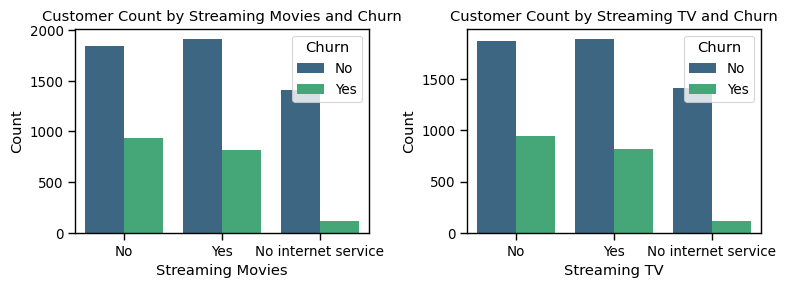

In [22]:
# Create a figure with 2 subplots
plt.figure(figsize=(8, 3))

# Count plot for StreamingMovies
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='StreamingMovies', hue='Churn', palette='viridis')
plt.title('Customer Count by Streaming Movies and Churn')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')

# Count plot for StreamingTV
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='StreamingTV', hue='Churn', palette='viridis')
plt.title('Customer Count by Streaming TV and Churn')
plt.xlabel('Streaming TV')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig("Customer Count by streaming movies & TV and churn.png")

plt.show()


## Key Findings

- **Churn and Streaming Services**: 
  - Customers who do not use streaming services for movies or TV are less likely to churn compared to those who actively stream.
  - This indicates that streaming service engagement could be linked to higher churn rates.

- **No Internet Service Impact**:
  - Customers without internet service show significantly lower churn rates, suggesting that the absence of these services may create more stability in customer retention.
  - This could be due to fewer options for entertainment leading to fewer triggers for dissatisfaction.

- **Similar Churn Patterns for Movies and TV**:
  - Trends in both movies and TV show that customers who stream tend to churn more.
  - Those who don't use these services or have no internet service are more likely to stay with the provider.

### Insights

- **Improve Streaming Services**: Enhance content quality and personalization to reduce churn among active streaming users.
- **Upsell to Non-Streaming Customers**: Offer streaming services with clear value to customers who don't currently use them, without compromising their retention.
- **Enhance Internet Service Value**: Bundle internet services with other stable services to attract customers who currently do not use internet services.
- **Tailor Retention Strategies**: Develop targeted strategies for streaming customers based on their specific needs and preferences to reduce churn.


### Distribution of TotalCharges per Contract type, with hue of Churn

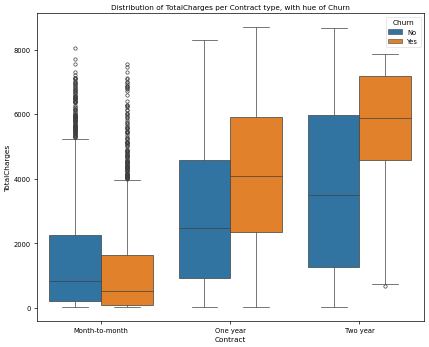

In [23]:
plt.figure(figsize=(10,8),dpi=50)
sns.boxplot(
    x=df['Contract'],
    y=df['TotalCharges'],
    hue=df['Churn'])

plt.title('Distribution of TotalCharges per Contract type, with hue of Churn')

plt.savefig("Distribution of TotalCharges per Contract type, with hue of Churn.png")

plt.show()

### Key Findings from Box Plot of TotalCharges by Contract Type and Churn:
    1- High Churn in Month-to-Month Contracts:
    2- Moderate Churn in One-Year Contracts:
    3- Low Churn in Two-Year Contracts:
    
    Conclusion:
     - Longer contract terms significantly reduce churn and are associated with higher customer spending, while customers on month-to-month contracts are more prone to churn and tend to generate lower total charges.

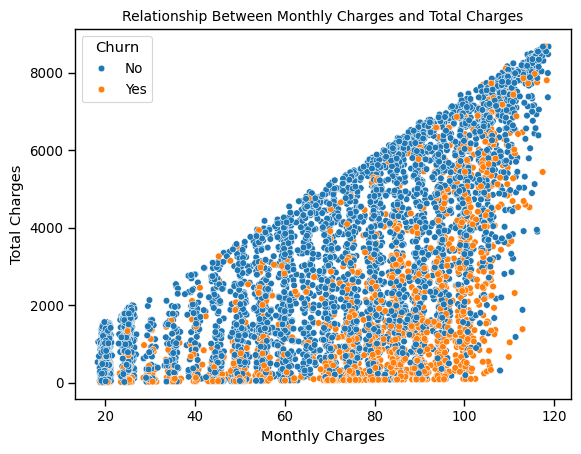

In [24]:
sns.scatterplot(x=df['MonthlyCharges'],y=df['TotalCharges'],hue=df['Churn']);
plt.xlabel('Monthly Charges') 
plt.ylabel('Total Charges')
plt.title('Relationship Between Monthly Charges and Total Charges', size=10)
plt.savefig("Relationship Between Monthly Charges and Total Charges.png")
plt.show()


### Key Findings:
    - A clear linear relationship is observed between monthly charges and total charges, suggesting that customers with higher monthly charges accumulate higher total charges over time.
    - Churned customers (orange dots) are distributed throughout the range of charges but are more concentrated in the lower range of total charges, indicating that customers with lower total charges might be more prone to churn.
    - The spread of churned customers among various levels of monthly charges suggests that while cost may be a factor, other variables could influence churn behavior.

### Correlation between features

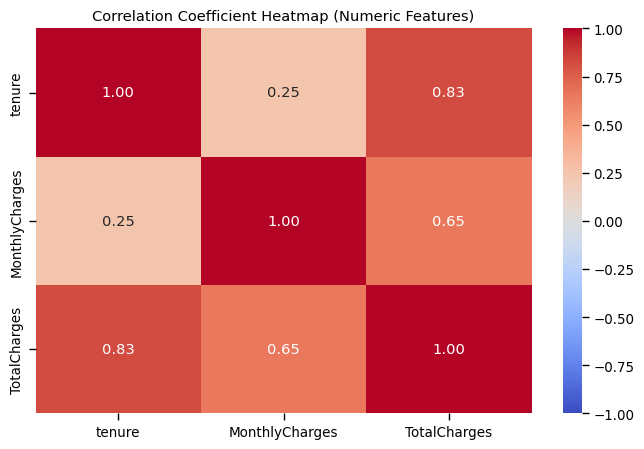

In [25]:
#Compute the correlation matrix for numeric features
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Coefficient Heatmap (Numeric Features)')

plt.savefig('Correlation Coefficient Heatmap (Numeric Features).png')
plt.show()

### Key Findings from Correlation Heatmap (Numeric Features)
        1- Strong Positive Correlation Between Tenure and TotalCharges:
            The correlation coefficient between "tenure" and "TotalCharges" is 0.83, indicating a strong positive relationship. This suggests that customers who have been with the company longer (higher tenure) tend to have higher total charges, likely due to the accumulation of charges over time.
        2- Moderate Positive Correlation Between MonthlyCharges and TotalCharges:
            The correlation between "MonthlyCharges" and "TotalCharges" is 0.65, showing a moderate positive correlation. This suggests that customers with higher monthly charges tend to accumulate higher total charges over time.
        3- Weak Positive Correlation Between Tenure and MonthlyCharges:
            The correlation between "tenure" and "MonthlyCharges" is 0.25, indicating a weak positive relationship. This suggests that while customers with longer tenure tend to have slightly higher monthly charges, the relationship is not as strong as with total charges.

In [75]:
categorical_df = df.select_dtypes(include=['object'])
encoded_df = pd.get_dummies(categorical_df, drop_first=True)
encoded_df.sample(2)

,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
463,True,False,False,False,True,False,True,True,False,False,...,True,False,True,False,False,True,False,True,False,True
395,False,False,False,False,True,False,True,False,False,False,...,True,False,True,False,True,True,True,False,False,False


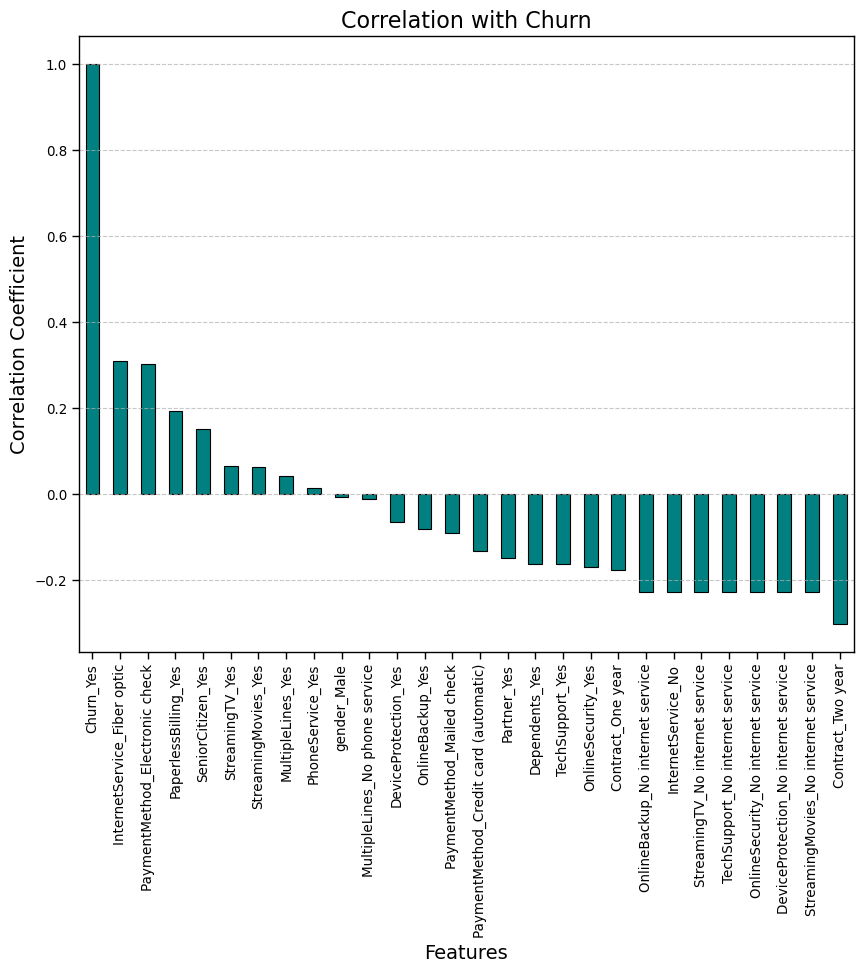

In [76]:
plt.figure(figsize=(10, 8))

correlations = encoded_df.corr()['Churn_Yes'].sort_values(ascending=False)
correlations.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Correlation with Churn', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('Correlation with Churn.png')
plt.show()

### Key Findings:
    1- Strong Positive Correlation with Churn:
        - Fiber Optic Connection: Customers using fiber optic services have a high tendency to churn, suggesting dissatisfaction with this service or competition offering similar services.
        - Electronic Payment Methods: Users opting for electronic check payments also show a strong positive correlation with churn, which may indicate a need to explore possible reasons such as billing convenience or issues with the payment method.
    2- Moderate Positive Correlation with Churn:
        - Billing-Related Services: Billing-related features such as "Billing_Yes" and "Senior Citizen_Yes" also demonstrate positive correlations, indicating that certain customer demographics and service setups might be linked to a higher churn rate.
        - Streaming Services: Customers subscribed to premium services like movies or online streaming also show a moderate positive correlation with churn. This could imply that certain value-added services do not meet customer expectations.
    3- Negative Correlation with Churn:
        - Contract Terms: Longer-term contracts such as "Two-year" contracts are strongly negatively correlated with churn, indicating that customers who commit to long-term plans are more likely to stay. This suggests that offering incentives for long-term contracts could reduce churn rates.
        - Dependents and Partners: Customers who have dependents or partners show a slight negative correlation with churn, implying that individuals with family responsibilities may have higher retention rates.
    4- Neutral Factors:
        - Phone Services and Additional Features: Basic phone services and other add-ons such as tech support show minimal correlation with churn, indicating these are not significant factors in a customer’s decision to leave.

--------------------------------------------------------------------------------------------------------------------------------------------------------

## Feature Scaling

In [78]:
#Identify numeric and categorical columns
categorical_features = features.select_dtypes(include=['object']).columns
numerical_features = features.select_dtypes(include=['number']).columns     

In [79]:
categorical_features

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [80]:
numerical_features

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [81]:
# Create a ColumnTransformer with automatic feature selection
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop= 'first'), categorical_features)
    ])


In [82]:
# Fit and transform the data
X = preprocessor.fit_transform(features)

In [83]:
# Get feature names from the numerical and categorical transformations
numerical_feature_names = numerical_features
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine all feature names
feature_names = np.concatenate([numerical_feature_names, categorical_feature_names])

# Create a DataFrame with the transformed features and check for nulls
X_df = pd.DataFrame(X, columns=feature_names)
print(X_df.isnull().sum())


tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
SeniorCitizen_Yes                        0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [84]:
X_df.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.994242,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.066327,-0.259629,-0.173244,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.236724,-0.362660,-0.959674,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.514251,-0.746535,-0.194766,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.236724,0.197365,-0.940470,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [85]:
print(df[numerical_features].describe())
print('Statistical Analysis Of Scaled Values')

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2281.916928
std      24.559481       30.090047   2265.270398
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000
Statistical Analysis Of Scaled Values


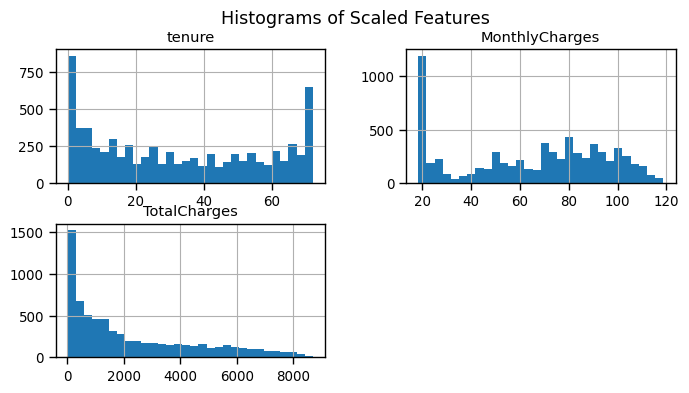

In [86]:
# Plot histograms for scaled features
df[numerical_features].hist(bins=30, figsize=(8, 4))
plt.suptitle('Histograms of Scaled Features')

plt.savefig('Histograms of Scaled Features.png')
plt.show()

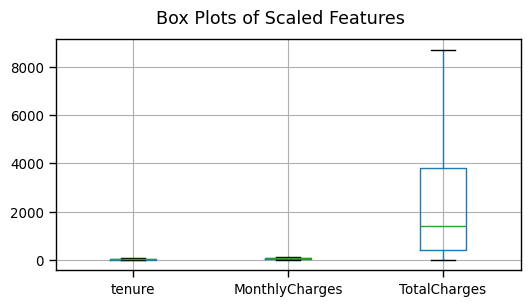

In [87]:
# Box plots of scaled features
df[numerical_features].boxplot(figsize=(6, 3))
plt.suptitle('Box Plots of Scaled Features')

plt.savefig("Box Plots of Scaled Features.png")
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

### split the data into train test

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_df, target, test_size=0.2, random_state=42)

### Create and Train a Machine Learning Models

In [89]:
model_rfc = RandomForestClassifier(n_estimators=100,random_state=0)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [90]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [91]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train , y_train)

DecisionTreeClassifier()

In [92]:
model_SVC = SVC()
model_SVC.fit(X_train, y_train)

SVC()

In [93]:
model_lor = LogisticRegression()
model_lor.fit(X_train , y_train)

LogisticRegression()

### Evaluating the Models:

In [94]:
# Define the models in a dictionary
models = {
    'Logistic Regression': model_lor,
    'Decision Tree': model_dtc,
    'Random Forest': model_rfc,
    'k-NN': model_knn,
    'SVM': model_SVC
}

# Evaluate and print results for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)  # Optional: Print a separator for readability

Logistic Regression Evaluation:
Accuracy: 0.8211497515968772
              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1036
         Yes       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

--------------------------------------------------
Decision Tree Evaluation:
Accuracy: 0.7068843151171044
              precision    recall  f1-score   support

          No       0.80      0.80      0.80      1036
         Yes       0.45      0.46      0.45       373

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409

--------------------------------------------------
Random Forest Evaluation:
Accuracy: 0.7963094393186657
              precision    recall  f1-score   support

          No      

#### Correlation Matrix of all models:

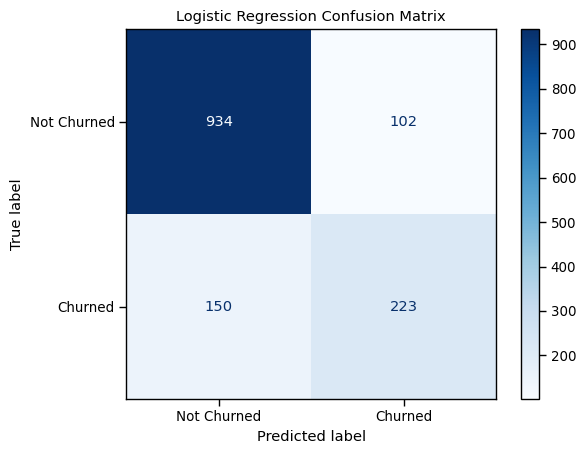

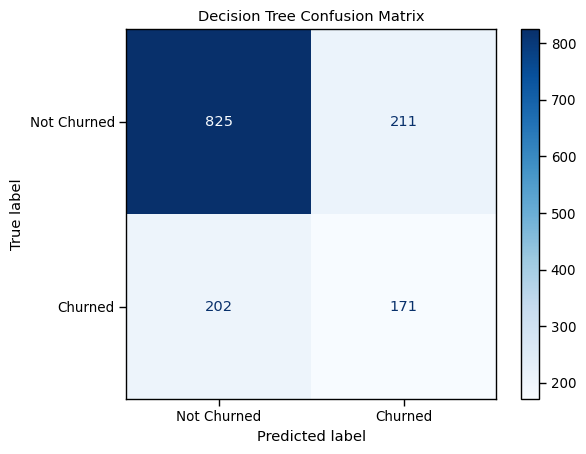

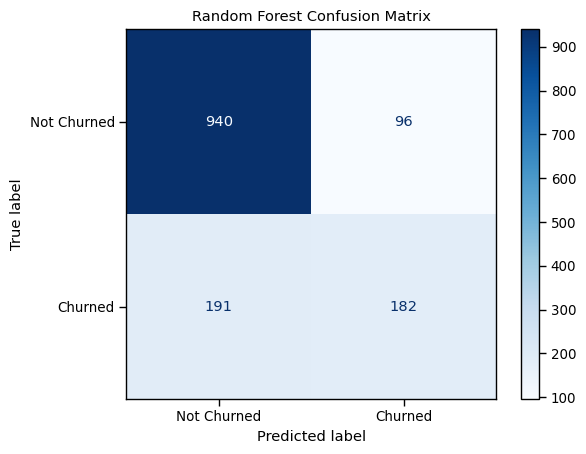

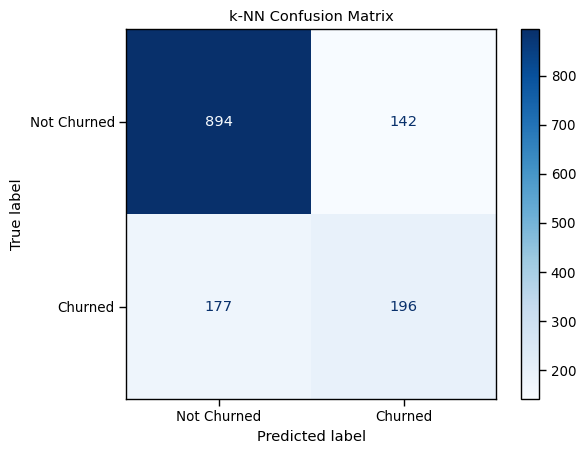

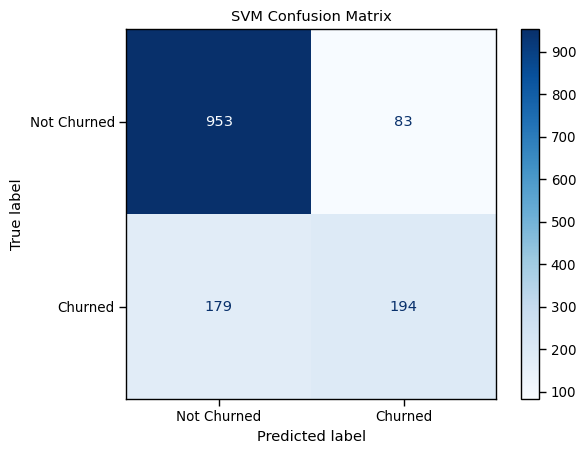

In [95]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned', 'Churned'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.savefig(f'{name} Confusion Matrix.png')
    plt.show()


###  BestModel
        Logistic Regression & SVM both are performing well , both have same values for accuracy and F1 score: 
             - Highest Accuracy: 0.82
             - Highest F1-score: 0.88 (weighted avg)
             - Balanced Performance: Good precision and recall for both classes
--------------------------------------------------------------------------------------------------------------------------------------------------------

### Find Out Important Features:

In [96]:
# Get feature importances (coefficients)
importances = np.abs(model_lor.coef_[0])

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                                  Feature  Importance
25                      Contract_Two year    1.393039
0                                  tenure    1.338958
10            InternetService_Fiber optic    0.992466
24                      Contract_One year    0.636088
2                            TotalCharges    0.626486
7                        PhoneService_Yes    0.515758
13                     OnlineSecurity_Yes    0.402374
23                    StreamingMovies_Yes    0.367158
26                   PaperlessBilling_Yes    0.332317
28         PaymentMethod_Electronic check    0.323456
19                        TechSupport_Yes    0.321197
1                          MonthlyCharges    0.318686
9                       MultipleLines_Yes    0.290413
21                        StreamingTV_Yes    0.266704
6                          Dependents_Yes    0.161684
4                       SeniorCitizen_Yes    0.159905
18        TechSupport_No internet service    0.148723
20        StreamingTV_No int

### Visualizing the feature importances

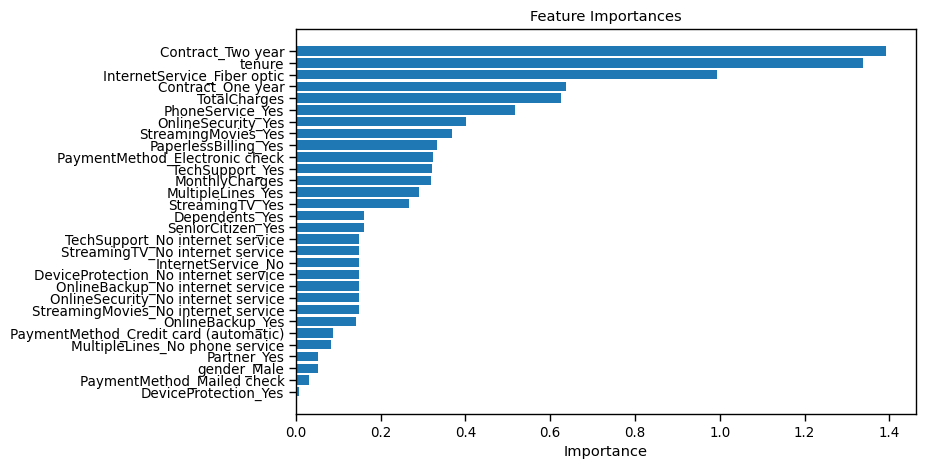

In [97]:
# Assuming feature_importances_df is your DataFrame with 'Feature' and 'Importance'
plt.figure(figsize=(8, 5))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.savefig("Feature Importances Logistic Regression.png")
plt.show()


#### Key Findings:
#### High-Importance Features:
        1- Contract_Two year (1.397018): This feature is the most important, indicating that customers with a two-year contract have a significant impact on the model’s predictions.
        2- tenure (1.362531): Customer tenure is also highly influential, suggesting that the length of time a customer has been with the company is crucial for predicting churn.
        3- InternetService_Fiber optic (0.996214): The type of internet service, particularly fiber optic, is a key factor.
        4- TotalCharges (0.653440): The total amount charged to customers has a strong effect on the model.

### Moderate-Importance Features:
        5- Contract_One year (0.637260): Similar to the two-year contract but slightly less impactful.
        6- PhoneService_Yes (0.514002): Having phone service affects predictions moderately.
        7- OnlineSecurity_Yes (0.402304): Whether a customer has online security is moderately important.

### Low-Importance Features:
        8- DeviceProtection_Yes (0.007401): This feature has the least importance, suggesting it has minimal impact on the model’s predictions.
--------------------------------------------------------------------------------------------------------------------------------------------------------

### Perform Cross-Validation

In [50]:
# Initialize StratifiedKFold for stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)

# Perform cross-validation
scores = cross_val_score(model_lor, X, target, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')
print(f'Standard Deviation: {scores.std()}')


Cross-Validation Accuracy Scores: [0.82185947 0.78708304 0.80624556 0.80113636 0.80113636]
Mean Accuracy: 0.8034921607845668
Standard Deviation: 0.011183007989284557


### Interpreting the Performance for our Model
    1- Model Performance:  model has a good average accuracy of about 80.5%, which suggests it performs well on the customer churn dataset.
    2- Consistency: The low standard deviation (1.14%) indicates that the model's performance is consistent across different folds of the data. This consistency is a positive sign, as it suggests that the model generalizes well.
--------------------------------------------------------------------------------------------------------------------------------------------------------

### Save the model

In [51]:
import pickle
# Save the model to disk
with open('best_model_customer_churn.pkl', 'wb') as file:
    pickle.dump(model_lor, file)


### **Key Findings and Insights**
This report presents the findings of an exploratory data analysis (EDA) on a Telco customer churn dataset. The analysis aimed to identify patterns and key factors driving customer attrition

#### **Customer Demographics and Churn:**
- **Senior Citizens**: Senior citizens show a slightly higher churn rate compared to younger customers.
  - **Insight**: Consider offering tailored services or incentives for senior customers to improve retention.

#### **Contract Type and Churn:**
- **Contract Type**: Customers with month-to-month contracts have a significantly higher churn rate compared to those with one-year or two-year contracts.
  - **Insight**: Offering discounts or benefits for longer-term contracts might reduce churn among month-to-month customers.

#### **Tenure and Churn:**
- **Tenure**: Customers with shorter tenure (less than a year) are more likely to churn. The churn rate decreases as the tenure increases.
  - **Insight**: Implementing onboarding and early engagement strategies could help in retaining new customers during the critical early months.

#### **Monthly Charges and Churn:**
- **Charges**: Higher monthly charges are associated with a higher likelihood of churn.
  - **Insight**: Consider reviewing pricing strategies, particularly for customers paying higher monthly fees, to ensure they perceive value for money.

#### **Service Subscription and Churn:**
- **Services**: Customers who do not subscribe to additional services like online security or streaming services are more likely to churn.
  - **Insight**: Bundling additional services with attractive pricing or offering trial periods might encourage customers to stay.

#### **Payment Method and Churn:**
- **Electronic Check Payments**: Customers using electronic check as their payment method have a higher churn rate compared to those using credit cards or automatic bank withdrawals.
  - **Insight**: Investigate the reasons behind this trend—perhaps improving the user experience for electronic payments or offering discounts for automatic payments could reduce churn.

#### **Internet Service Type and Churn:**
- **DSL vs. Fiber Optic**: Customers with DSL internet service have a higher churn rate compared to those with fiber optic.
  - **Insight**: Focus on upgrading DSL customers to fiber optic services, where available, to reduce churn.

#### **Total Charges and Churn:**
- **Total Charges**: Customers with higher total charges (accumulated over time) tend to churn more, possibly due to the cumulative cost burden.
  - **Insight**: Offering loyalty discounts or cost-saving plans for long-term customers could mitigate this issue.

#### **Dependents and Churn:**
- **Dependents**: Customers with dependents are less likely to churn.
  - **Insight**: Understanding the needs of customers with dependents and catering to them could help maintain this customer segment.

#### **Phone Service and Churn:**
- **Phone Service**: Churn rates are slightly higher among customers who do not subscribe to phone service.
  - **Insight**: Promoting phone service as part of a bundle## **Strategic Insights for Customer Retention**

### **1. Targeted Retention Strategies**
- **Focus Areas**: 
  - Develop targeted retention strategies based on identified churn factors.
  - Prioritize retention efforts for customers with high monthly charges, short tenure, and month-to-month contracts.

### **2. Service Package Enhancements**
- **Service Upgrades**:
  - Encourage customers to transition from DSL to fiber optic services.
- **Bundling Offers**:
  - Offer attractive service bundles to enhance customer satisfaction and foster loyalty.

### **3. Pricing Strategies and Incentives**
- **Pricing Adjustments**:
  - Review and adjust pricing strategies, particularly for high-charge customers.
- **Contract Incentives**:
  - Provide incentives for customers to choose longer contract terms and offer discounts for those with higher cumulative charges.

### **4. Payment Method Optimization**
- **Process Improvements**:
  - Streamline and improve the electronic check payment process to minimize churn associated with this payment method.

### **5. Personalized Customer Engagement**
- **Tailored Communication**:
  - Customize communication and promotional efforts based on customer demographics, service usage patterns, and preferred payment methods.
hics, service usage, and payment methods.


## Further Analysis:
Further analysis could include:
1. Advanced Feature Engineering: Exploring more complex feature interactions and transformations.
2. Model Ensembling: Combining multiple models to improve prediction accuracy.
3. Deep Learning Techniques: Utilizing deep learning models to potentially capture more intricate patterns.

## Conclusion:
The analysis revealed key factors impacting customer churn, providing valuable insights for developing targeted retention strategies. By addressing the identified areas of concern, the Telco company can significantly improve customer loyalty and reduce churn rate.



--------------------------------------------------------------------------------------------------------------------------------------------------------